In [1]:
%matplotlib inline
import Euclid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.table import Table
from astropy import units as u
from tqdm.notebook import tqdm

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
%elogin

In [4]:
%erun PHZ_NNPZ

In [5]:
from nnpz.reference_sample.ReferenceSample import ReferenceSample

In [6]:
tu_tile = Table.read('/home/aalvarez/Work/Data/SC7/TU/EUC-GALCAT-2020-01-14_HPIX_5_NEST_4208.fits')

In [8]:
sc7 = Table.read('/home/aalvarez/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/RUN_with_LSST_TU.fits')

In [9]:
ref_sample = ReferenceSample('/home/aalvarez/Work/Data/SC7/ReferenceSample/')

In [10]:
ids = ref_sample.getIds()
ref_zs = np.zeros((len(ids)))

In [11]:
for i, ref_id in enumerate(tqdm(ids)):
    pdz = ref_sample.getPdzData(ref_id)
    ref_zs[i] = np.average(pdz[:,0], weights=pdz[:,1])

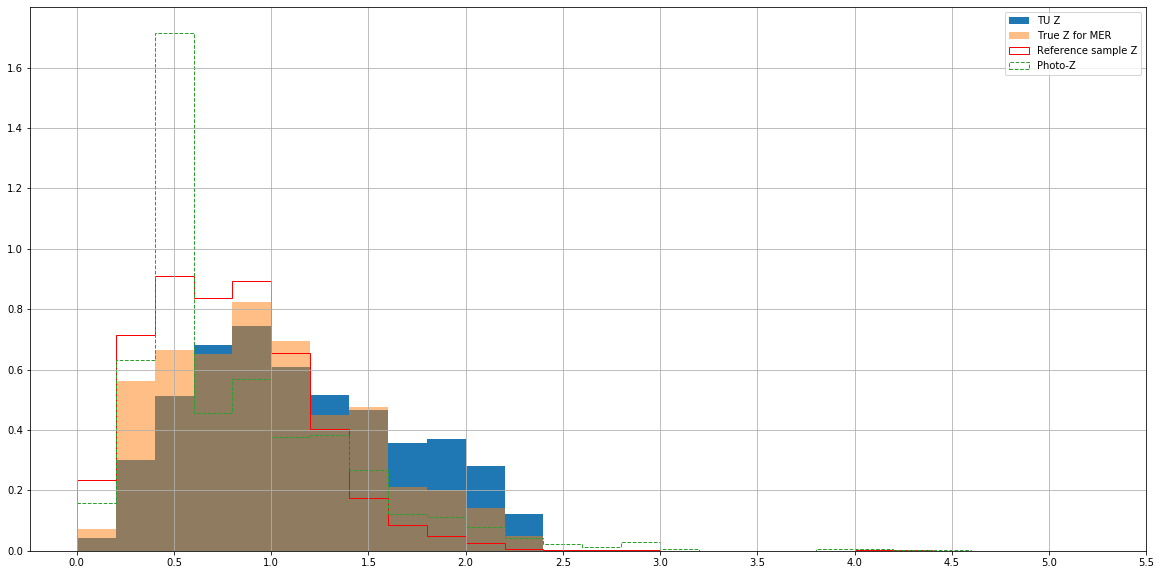

In [12]:
plt.figure()
bins = np.arange(0, 5, 0.2)
plt.hist(tu_tile['Z_OBS'], bins=bins, density=True, label='TU Z')
plt.hist(sc7['Z_OBS'], bins=bins, density=True, label='True Z for MER', alpha=0.5)
plt.hist(ref_zs, bins=bins, density=True, label='Reference sample Z', histtype='step', color='red')
plt.hist(sc7['REDSHIFT_MODE'], bins=bins, density=True, label='Photo-Z', histtype='step', linestyle='--')
plt.grid(True)
plt.xticks(np.arange(0, 6, 0.5))
plt.legend()